In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import datetime
%matplotlib inline

# Task 0

In [9]:
#Import the data
df_dsg = pd.read_csv('mp1_av_disengagements.csv')
df_miles = pd.read_csv('mp1_av_totalmiles.csv')

In [5]:
#Summarize information

total_disengagements = df_miles['total number of disengagements'].sum()
num_unique_months = df_miles['Month'].nunique()
unique_locations = df_dsg['Location'].unique().tolist()
num_unique_causes = df_dsg['Cause'].nunique()

#missing values for disengagement.csv
index_cols_missing_values = df_dsg.isnull().sum().nonzero()
cols_missing_values = df_dsg.columns[index_cols_missing_values]
dsg_missing_values = df_dsg[cols_missing_values].isnull().sum()
#Found 532 values in column Reaction Time

#missing values for totalmiles.csv
index_cols_missing_values = df_miles.isnull().sum().nonzero()
cols_missing_values = df_miles.columns[index_cols_missing_values]
miles_missing_values = df_miles[cols_missing_values].isnull().sum()
#Found none

2 leading causes - Unwanted Driver Discomfort & Recklessly behaving agent


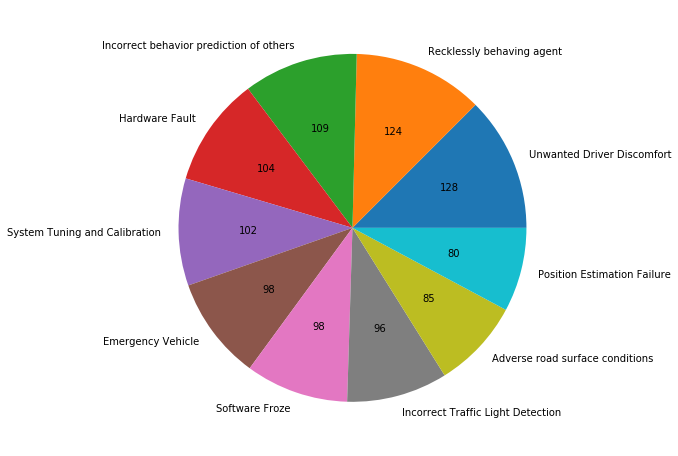

In [7]:
#plot pie chart
causes = df_dsg['Cause'].value_counts()
plt.figure(figsize = (8,8))
patches, texts, _ = plt.pie(causes, labels=causes.keys(), autopct = lambda p: '{:.0f}'.format(p*sum(causes)/100))
print('2 leading causes - Unwanted Driver Discomfort & Recklessly behaving agent')

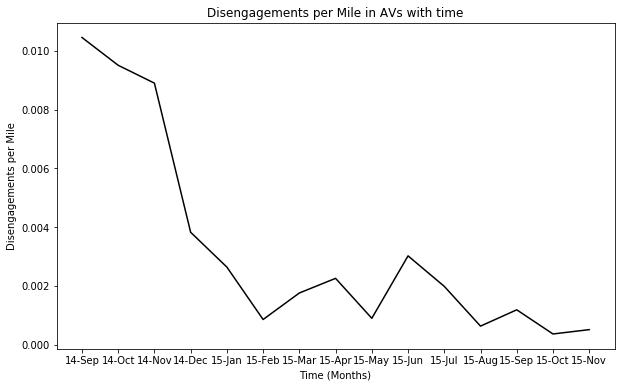

Yes, AVs are maturing over time


In [8]:
#plot for disengagement/mile over time
df_miles['Disengagement/Mile'] = df_miles['total number of disengagements']/df_miles['miles driven in autonomous mode']
df_miles_toplot = df_miles[df_miles['Car'] == df_miles.loc[0,'Car']]

plt.figure(figsize = (10,6))
plt.plot(df_miles_toplot['Month'], df_miles_toplot['Disengagement/Mile'], color = 'black')
ax = plt.gca()
ax.set_xlabel('Time (Months)')
ax.set_ylabel('Disengagements per Mile')
ax.set_title('Disengagements per Mile in AVs with time')
plt.show()
print('Yes, AVs are maturing over time')

# Task 1